In [ ]:
#Description: This is a sentiment analyzer program that parses tweets derived from twitter.

In [23]:
#importing libraries needed
import tweepy                  
from textblob import TextBlob  
from wordcloud import WordCloud  
import pandas as pd            
import numpy as np              
import re                        
import matplotlib.pyplot as plt   
plt.style.use('fivethirtyeight'); 
import nltk
from nltk.corpus import twitter_samples  
from nltk.corpus import stopwords         
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
import string



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
from google.colab import files
uploaded=files.upload()

Saving Apple.xlsx to Apple.xlsx


In [8]:
excel_data = pd.read_excel('Apple.xlsx')

In [10]:
df = pd.DataFrame(excel_data, columns=['text'])
df

,text
0,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,My cat only chews @apple cords. Such an #Apple...
3,I agree with @jimcramer that the #IndividualIn...
4,Nobody expects the Spanish Inquisition #AAPL
...,...
3881,(Via FC) Apple Is Warming Up To Social Media -...
3882,RT @MMLXIV: there is no avocado emoji may I as...
3883,@marcbulandr I could not agree more. Between @...
3884,My iPhone 5's photos are no longer downloading...


In [11]:
def cleansent(tex):
  tex=re.sub(r'@[A-Za-z0-9]+','',tex)
  tex=re.sub(r'#','',tex)
  tex=re.sub(r':','',tex)
  tex=re.sub(r'RT[\s]+','',tex)
  tex=re.sub(r'https?:\/\/\S+','',tex)
  return tex

df['text']=df['text'].apply(cleansent)

df

,text
0,AAPLThe 10 best Steve Jobs emails ever...http/...
1,Why AAPL Stock Had a Mini-Flash Crash Today $A...
2,My cat only chews cords. Such an AppleSnob.
3,I agree with that the IndividualInvestor shou...
4,Nobody expects the Spanish Inquisition AAPL
...,...
3881,(Via FC) Apple Is Warming Up To Social Media -...
3882,there is no avocado emoji may I ask why
3883,I could not agree more. Between and only g...
3884,My iPhone 5's photos are no longer downloading...


In [12]:
def thesub(texsub):
  return TextBlob(texsub).sentiment.subjectivity

def thepol(texpol):
  return TextBlob(texpol).sentiment.polarity

df['TextSubjectivity']=df['text'].apply(thesub)
df['TextPolarity']=df['text'].apply(thepol)

df

,text,TextSubjectivity,TextPolarity
0,AAPLThe 10 best Steve Jobs emails ever...http/...,0.300000,1.000000
1,Why AAPL Stock Had a Mini-Flash Crash Today $A...,0.000000,0.000000
2,My cat only chews cords. Such an AppleSnob.,0.750000,0.000000
3,I agree with that the IndividualInvestor shou...,0.800000,0.650000
4,Nobody expects the Spanish Inquisition AAPL,0.000000,0.000000
...,...,...,...
3881,(Via FC) Apple Is Warming Up To Social Media -...,0.377778,0.022222
3882,there is no avocado emoji may I ask why,0.000000,0.000000
3883,I could not agree more. Between and only g...,0.750000,0.433333
3884,My iPhone 5's photos are no longer downloading...,0.000000,0.000000


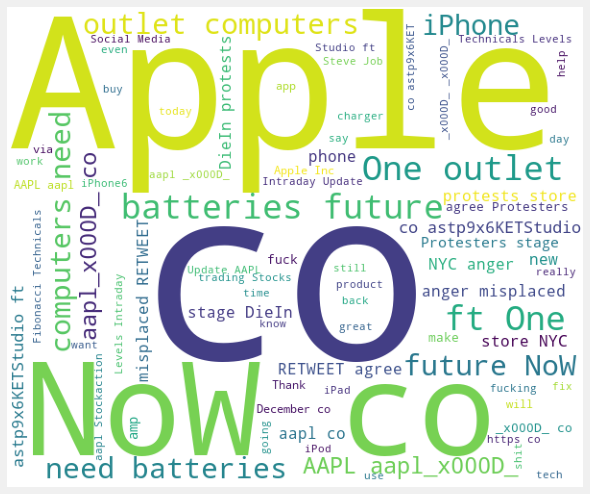

In [13]:
words=''.join([twts for twts in df['text']])
 
wordcloud = WordCloud(width = 600, height = 500,random_state=21,background_color ='white',min_font_size = 10).generate(words)
# plotting the wordcloud image                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [14]:
def analysis(texanaly):
  if texanaly<0:
    return 'Negative'
  elif texanaly==0:
    return 'Neutral'
  else:
    return 'Positive'
  return 

df['TextAnalysis']=df['TextPolarity'].apply(analysis)

df

,text,TextSubjectivity,TextPolarity,TextAnalysis
0,AAPLThe 10 best Steve Jobs emails ever...http/...,0.300000,1.000000,Positive
1,Why AAPL Stock Had a Mini-Flash Crash Today $A...,0.000000,0.000000,Neutral
2,My cat only chews cords. Such an AppleSnob.,0.750000,0.000000,Neutral
3,I agree with that the IndividualInvestor shou...,0.800000,0.650000,Positive
4,Nobody expects the Spanish Inquisition AAPL,0.000000,0.000000,Neutral
...,...,...,...,...
3881,(Via FC) Apple Is Warming Up To Social Media -...,0.377778,0.022222,Positive
3882,there is no avocado emoji may I ask why,0.000000,0.000000,Neutral
3883,I could not agree more. Between and only g...,0.750000,0.433333,Positive
3884,My iPhone 5's photos are no longer downloading...,0.000000,0.000000,Neutral


In [15]:
j=1
sortdf=df.sort_values(by=['TextPolarity'])
for i in range(0,sortdf.shape[0]):
  if (sortdf['TextAnalysis'][i]=='Positive'):
    print (str(j)+".)"+sortdf['text'][i])
    print()
    j+=1

1.)AAPLThe 10 best Steve Jobs emails ever...http//t.co/82G1kL94tx

2.)I agree with  that the IndividualInvestor should own not trade Apple AAPL, it's extended so today's pullback is good to see

3.)Top 3 all  tablets. Damn right! http//t.co/RJiGn2JUuB

4.)CNBCTV Apple's margins better than expected? aapl http//t.co/7geVrtOGLK

5.)Apple Watch Tops Search Engine List of Best Wearable Tech http//t.co/LTEzJzqqF8 AAPL iWatch AppleWatch

6.)Bought my  at the  store..pretty good logo match . can't wait to install it! http//t.co/z8VKMhbnR3

7.)aapl  Thanks to the non factual dumb Twitter followers stock drops 3 points in one minute. Thanks dummies. rumors

8.)The JH Hines Staff with their newly issued  ConnectED Macbook and iPad mini txed http//t.co/82YjiCJBxH

9.), For the love of GAWD, CENTER the '1'on the damn calendar app. You fixed it once, its back, off center, AGAIN! http//t.co/dMyAHEm1Lc

10.)i get the storage almost full notification literally every 5 minutes chill 

11.)Latest Apple 

In [16]:
j=1
sortdf=df.sort_values(by=['TextPolarity'],ascending='False')
for i in range(0,sortdf.shape[0]):
  if (sortdf['TextAnalysis'][i]=='Negative'):
    print (str(j)+".)"+sortdf['text'][i])
    print()
    j+=1

1.)WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW IS 29% WTF IS THIS 

2.) Contact sync between Yosemite and iOS8 is seriously screwed up. It used to be much more stable in the past. icloud isync

3.)- thanks for xtra checkin at upper westside store- but why are appointments running almost 50 minutes late?

4.) U need to get ur fucking shit together and let me txt while on YouTube

5.)  Wish we could prosecute the admin for violation of privacy and criminal search and seizure

6.)hey  fuck you

7.) why doesn't your people explain precautions when buying an expensive laptop

8.)_  u was bored huh

9.)As a die hard  customer, I must say I am truly displeased with the customer service I was given today. badservice Apple

10.) made it clear today that I as a customer are not worth a measly $79!! An employee gave mis info and they will not stand behind it

11.)Buy round lot on the open MT  AAPL stock briefly dove 6.4% today. Analysts not sure why http//t.co/F6e73eJUJE http//t.co/2qQvMWOotv



<function matplotlib.pyplot.show>

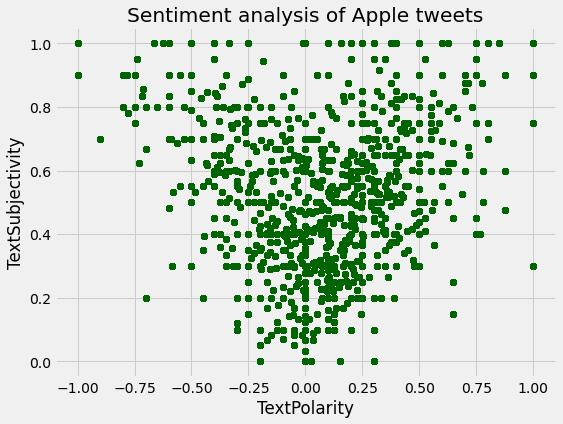

In [17]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['TextPolarity'],df['TextSubjectivity'],color="darkgreen",)
plt.title('Sentiment analysis of Apple tweets')
plt.ylabel('TextSubjectivity')
plt.xlabel('TextPolarity')
plt.show

In [18]:
#percentage of positive tweets
pos_percent=df[df.TextAnalysis=='Positive']
pos_percent=pos_percent['text']
str(round((pos_percent.shape[0]/df.shape[0])*100,4))+"%"

'30.0309%'

In [19]:
#percentage of negative tweets
pos_percent=df[df.TextAnalysis=='Negative']
pos_percent=pos_percent['text']
str(round((pos_percent.shape[0]/df.shape[0])*100,4))+"%"

'19.7118%'

In [20]:
#percentage of neutral tweets
pos_percent=df[df.TextAnalysis=='Neutral']
pos_percent=pos_percent['text']
str(round((pos_percent.shape[0]/df.shape[0])*100,4))+"%"

'50.2573%'

<function matplotlib.pyplot.show>

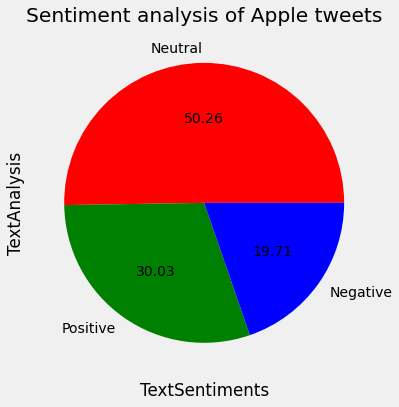

In [21]:
plt.title('Sentiment analysis of Apple tweets')
plt.xlabel('TextSentiments')
df['TextAnalysis'].value_counts().plot(kind='pie',colors=["r", "g", "b", "c"],
    autopct="%.2f",figsize=(6, 6))
plt.show

In [2]:
#Naive Bayes algorithm
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [22]:
#tokenizing
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

def tokenize_tweet(tweet):
    
    tweet_tokens = tokenizer.tokenize(tweet)
    
    return tweet_tokens
tkns=df['text'].apply(tokenize_tweet)
print (tkns)

0       [aaplthe, 10, best, steve, jobs, emails, ever....
1       [why, aapl, stock, had, a, mini-flash, crash, ...
2       [my, cat, only, chews, cords, ., such, an, app...
3       [i, agree, with, that, the, individualinvestor...
4       [nobody, expects, the, spanish, inquisition, a...
                              ...                        
3881    [(, via, fc, ), apple, is, warming, up, to, so...
3882    [there, is, no, avocado, emoji, may, i, ask, why]
3883    [i, could, not, agree, more, ., between, and, ...
3884    [my, iphone, 5, ', s, photos, are, no, longer,...
3885    [we're, so, excited, to, be, named, to, ', s, ...
Name: text, Length: 3886, dtype: object


In [25]:
#Removing stopwords and punctuations
stopwords_english = stopwords.words('english')

punctuations = string.punctuation

def remove_stopwords_punctuations(tweet_tokens):
    
    tweets_clean = []
    
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in punctuations):
            tweets_clean.append(word)
            
    return tweets_clean

In [26]:
stemmer = PorterStemmer()

def get_stem(tweets_clean):
    
    tweets_stem = []
    
    for word in tweets_clean:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)
        
    return tweets_stem

In [27]:
def process_tweet(tweet):
    processed_tweet = cleansent(tweet)
    tweet_tokens = tokenize_tweet(processed_tweet)
    tweets_clean = remove_stopwords_punctuations(tweet_tokens)
    tweets_stem = get_stem(tweets_clean)
    
    return tweets_stem

In [28]:
cleantkns=df['text'].apply(process_tweet)
print (cleantkns)

0       [aaplth, 10, best, steve, job, email, ever...h...
1       [aapl, stock, mini-flash, crash, today, aapl, ...
2                            [cat, chew, cord, applesnob]
3       [agre, individualinvestor, trade, appl, aapl, ...
4               [nobodi, expect, spanish, inquisit, aapl]
                              ...                        
3881    [via, fc, appl, warm, social, media, appl, hir...
3882                           [avocado, emoji, may, ask]
3883    [could, agre, great, thing, happen, appleandib...
3884    [iphon, 5, photo, longer, download, automat, l...
3885    [we'r, excit, name, app, store, best, 2014, li...
Name: text, Length: 3886, dtype: object


In [40]:
train_pos = all_positive_tweets
train_neg = all_negative_tweets

train_x = train_pos + train_neg
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))


In [30]:
def create_frequency(tweets, ys):
    
    freq_d = {}

    for tweet,y in zip(tweets,ys):
      for word in process_tweet(tweet):
        pair=(word,y)
        if pair in freq_d:
          freq_d[pair]+=1
        else:
          freq_d[pair]=freq_d.get(pair,1)
    return freq_d

In [32]:
#show frequency distribution 
tweets =df['text']
ys = [1, 0, 0, 0, 0]

freq_d = create_frequency(tweets, ys)
print(freq_d)

{('aaplth', 1): 1, ('10', 1): 1, ('best', 1): 1, ('steve', 1): 1, ('job', 1): 1, ('email', 1): 1, ('ever...http//t.co/82g1kl94tx', 1): 1, ('aapl', 0): 5, ('stock', 0): 1, ('mini-flash', 0): 1, ('crash', 0): 1, ('today', 0): 1, ('http', 0): 1, ('t.co/hgfcjya0e9', 0): 1, ('cat', 0): 1, ('chew', 0): 1, ('cord', 0): 1, ('applesnob', 0): 1, ('agre', 0): 1, ('individualinvestor', 0): 1, ('trade', 0): 1, ('appl', 0): 1, ('extend', 0): 1, ("today'", 0): 1, ('pullback', 0): 1, ('good', 0): 1, ('see', 0): 1, ('nobodi', 0): 1, ('expect', 0): 1, ('spanish', 0): 1, ('inquisit', 0): 1}


In [33]:
#training the texts
freqs = create_frequency(train_x, train_y)

In [50]:
def train_naive_bayes(freqs, train_x, train_y):
    
    loglikelihood = {}
    logprior = 0
    
    unique_words = set([pair[0] for pair in freqs.keys()])
    V = len(unique_words)
 
    N_pos = N_neg = 0
    for pair in freqs.keys():
      if pair[1]>0:
          N_pos+=freqs[(pair)]
      else:
          N_neg+=freqs[(pair)] 
            

    D = train_y.shape[0]
    
 
    D_pos =sum(train_y)
    
    
    D_neg = D-sum(train_y)
    
   
    logprior = np.log(N_pos)-np.log(N_neg)

    for word in unique_words:
        
        
        freq_pos = freqs.get((word,1),0)
        freq_neg = freqs.get((word,0),0)
        
    
        p_w_pos = (freq_pos+1)/(N_pos+V)
        p_w_neg = (freq_neg+1)/(N_neg+V)
        
        
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
        
    return logprior, loglikelihood
    

In [51]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.07664300758766096
12995


In [49]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000
